# Время до закипания чайника

Исследуемая система  – электрочайник, с измерением потребляемой мощности, уровня в чайнике и температуры.


Даны следующие измерения с меткой времени:
- `Datetime` – дата, время измерения

- `P` – измеренная мощность, Вт

- `L` – измеренный уровень в чайнике, %

- `T` – измеренная температура, °C

 

Модель должна предсказывать время до закипания чайника в секундах

## 1. Загружаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns 

## 2. Загружаем данные

- Загружаем данные из файла 'data.csv'
- Данные разделены через ;
- Вещественные значения с использованием , заменяются на .
- Даты загружаются в правильном формате с помощью параметра parse_dates

In [2]:
data = pd.read_csv('data.csv', delimiter = ';', decimal = ',', parse_dates = [0])
data

,Datetime,P,L,T
0,2001-01-01 00:00:20,973.1,30.127,22.878
1,2001-01-01 00:00:30,1014.7,30.752,25.951
2,2001-01-01 00:00:40,979.0,31.214,28.080
3,2001-01-01 00:00:50,978.2,32.662,29.890
4,2001-01-01 00:01:00,1012.0,32.007,31.742
...,...,...,...,...
2155,2001-01-01 05:59:30,7.6,30.392,19.376
2156,2001-01-01 05:59:40,8.7,32.508,18.434
2157,2001-01-01 05:59:50,10.9,31.681,18.791
2158,2001-01-01 06:00:00,3.4,31.056,18.448


In [3]:
data.shape[0]

2160

In [4]:
data['P'].dtype

dtype('float64')

In [5]:
data['Datetime'].dtype

dtype('<M8[ns]')

## 3. Предобрабатываем данные
### Некоторые методы предобработки данных

- Визуализация
- Удаление и корректировка выбросов
- Обработка пропущенных значений
- Обработка категориальных признаков
- Нормализация данных
- Отбор признаков (feature selection)
   - Выявление коррелированных признаков
- Конструирование признаков (feature engineering)

#### 3.1. Feature engineering

Чайник кипит при температуре 100 градусов. Учтём погрешность в 0.5 градуса. Тогда будем считать кипением температуру > 99.5

In [6]:
data[data['T']>=99.5]

,Datetime,P,L,T
45,2001-01-01 00:07:50,3.2,9.553,99.580
187,2001-01-01 00:31:30,2.4,60.974,99.815
808,2001-01-01 02:15:00,1440.6,91.150,100.262
809,2001-01-01 02:15:10,1379.2,96.243,100.410
811,2001-01-01 02:15:30,1444.1,89.146,100.220
813,2001-01-01 02:15:50,1411.8,93.022,100.696
1360,2001-01-01 03:47:00,1953.8,80.734,99.977
1450,2001-01-01 04:02:00,1741.1,83.842,100.307
1991,2001-01-01 05:32:10,1753.7,30.404,99.873
1992,2001-01-01 05:32:20,0.7,29.740,99.593


Введём новую переменную, которая будет обозначать время до закипания чайника.

Значение i-ого наблюдения вычисляется следующим образом: из времени ближайшего закипания вычитаем текущее время.

Если температура >= 99.5, то время до закипания = 0.

Найдём индексы моментов кипения чайника. 

In [7]:
indexes_boiling = data[data['T']>=99.5].index
indexes_boiling

Int64Index([45, 187, 808, 809, 811, 813, 1360, 1450, 1991, 1992], dtype='int64')

Всего наш чайник закипал столько раз:

In [8]:
indexes_boiling.shape[0]

10

Создадим новый столбец для нашей переменной. Сначала заполним его нулями.

In [9]:
new_column = np.zeros(data.shape[0], dtype=int)
new_column

array([0, 0, 0, ..., 0, 0, 0])

Заполняем временем до начала кипения.

In [10]:
j = 0
for i in range (data.shape[0]):
    if (j<indexes_boiling.shape[0]):
        if (i<indexes_boiling[j]): 
            new_column[i] = (data['Datetime'][indexes_boiling[j]] - data['Datetime'][i]).total_seconds()
        if (i == indexes_boiling[j]):
            j+=1
    else:
        break

In [11]:
j=0
for i in new_column:
    print(j, "  ", i)
    j+=1

0    450
1    440
2    430
3    420
4    410
5    400
6    390
7    380
8    370
9    360
10    350
11    340
12    330
13    320
14    310
15    300
16    290
17    280
18    270
19    260
20    250
21    240
22    230
23    220
24    210
25    200
26    190
27    180
28    170
29    160
30    150
31    140
32    130
33    120
34    110
35    100
36    90
37    80
38    70
39    60
40    50
41    40
42    30
43    20
44    10
45    0
46    1410
47    1400
48    1390
49    1380
50    1370
51    1360
52    1350
53    1340
54    1330
55    1320
56    1310
57    1300
58    1290
59    1280
60    1270
61    1260
62    1250
63    1240
64    1230
65    1220
66    1210
67    1200
68    1190
69    1180
70    1170
71    1160
72    1150
73    1140
74    1130
75    1120
76    1110
77    1100
78    1090
79    1080
80    1070
81    1060
82    1050
83    1040
84    1030
85    1020
86    1010
87    1000
88    990
89    980
90    970
91    960
92    950
93    940
94    930
95    920
96    910
97    900

838    5220
839    5210
840    5200
841    5190
842    5180
843    5170
844    5160
845    5150
846    5140
847    5130
848    5120
849    5110
850    5100
851    5090
852    5080
853    5070
854    5060
855    5050
856    5040
857    5030
858    5020
859    5010
860    5000
861    4990
862    4980
863    4970
864    4960
865    4950
866    4940
867    4930
868    4920
869    4910
870    4900
871    4890
872    4880
873    4870
874    4860
875    4850
876    4840
877    4830
878    4820
879    4810
880    4800
881    4790
882    4780
883    4770
884    4760
885    4750
886    4740
887    4730
888    4720
889    4710
890    4700
891    4690
892    4680
893    4670
894    4660
895    4650
896    4640
897    4630
898    4620
899    4610
900    4600
901    4590
902    4580
903    4570
904    4560
905    4550
906    4540
907    4530
908    4520
909    4510
910    4500
911    4490
912    4480
913    4470
914    4460
915    4450
916    4440
917    4430
918    4420
919    4410
920    4400
921 

1632    3590
1633    3580
1634    3570
1635    3560
1636    3550
1637    3540
1638    3530
1639    3520
1640    3510
1641    3500
1642    3490
1643    3480
1644    3470
1645    3460
1646    3450
1647    3440
1648    3430
1649    3420
1650    3410
1651    3400
1652    3390
1653    3380
1654    3370
1655    3360
1656    3350
1657    3340
1658    3330
1659    3320
1660    3310
1661    3300
1662    3290
1663    3280
1664    3270
1665    3260
1666    3250
1667    3240
1668    3230
1669    3220
1670    3210
1671    3200
1672    3190
1673    3180
1674    3170
1675    3160
1676    3150
1677    3140
1678    3130
1679    3120
1680    3110
1681    3100
1682    3090
1683    3080
1684    3070
1685    3060
1686    3050
1687    3040
1688    3030
1689    3020
1690    3010
1691    3000
1692    2990
1693    2980
1694    2970
1695    2960
1696    2950
1697    2940
1698    2930
1699    2920
1700    2910
1701    2900
1702    2890
1703    2880
1704    2870
1705    2860
1706    2850
1707    2840
1708    2830

In [12]:
data[807:814]

,Datetime,P,L,T
807,2001-01-01 02:14:50,1421.3,93.353,97.199
808,2001-01-01 02:15:00,1440.6,91.150,100.262
809,2001-01-01 02:15:10,1379.2,96.243,100.410
810,2001-01-01 02:15:20,1450.4,95.911,95.695
811,2001-01-01 02:15:30,1444.1,89.146,100.220
812,2001-01-01 02:15:40,1379.8,96.799,99.382
813,2001-01-01 02:15:50,1411.8,93.022,100.696


Наблюдения отсортированы по времени. Оставим только те наблюдения, которые предшествуют последнему закипанию.

In [13]:
data = data[0:indexes_boiling[-1]]
data

,Datetime,P,L,T
0,2001-01-01 00:00:20,973.1,30.127,22.878
1,2001-01-01 00:00:30,1014.7,30.752,25.951
2,2001-01-01 00:00:40,979.0,31.214,28.080
3,2001-01-01 00:00:50,978.2,32.662,29.890
4,2001-01-01 00:01:00,1012.0,32.007,31.742
...,...,...,...,...
1987,2001-01-01 05:31:30,1746.2,31.558,86.678
1988,2001-01-01 05:31:40,1732.1,32.614,89.313
1989,2001-01-01 05:31:50,1708.2,30.972,94.401
1990,2001-01-01 05:32:00,1737.6,31.240,96.031


Представим столбец `Datetime` в формате целого числа. Пусть первое измерение равно нулевому моменту времени. Остальные измерения равны разности между текущим моментом времени и начальным. 

In [14]:
data['Datetime']

0      2001-01-01 00:00:20
1      2001-01-01 00:00:30
2      2001-01-01 00:00:40
3      2001-01-01 00:00:50
4      2001-01-01 00:01:00
               ...        
1987   2001-01-01 05:31:30
1988   2001-01-01 05:31:40
1989   2001-01-01 05:31:50
1990   2001-01-01 05:32:00
1991   2001-01-01 05:32:10
Name: Datetime, Length: 1992, dtype: datetime64[ns]

In [15]:
time_column = np.zeros(data.shape[0], dtype=int)
for i in range (data.shape[0]):
    time_column[i] = (data['Datetime'][i] - data['Datetime'][0]).total_seconds()
time_column
data['Datetime'] = time_column

C:\Users\Ксения\AppData\Local\Temp\ipykernel_6084\2763961507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Datetime'] = time_column


In [16]:
data

,Datetime,P,L,T
0,0,973.1,30.127,22.878
1,10,1014.7,30.752,25.951
2,20,979.0,31.214,28.080
3,30,978.2,32.662,29.890
4,40,1012.0,32.007,31.742
...,...,...,...,...
1987,19870,1746.2,31.558,86.678
1988,19880,1732.1,32.614,89.313
1989,19890,1708.2,30.972,94.401
1990,19900,1737.6,31.240,96.031


In [17]:
new_column = new_column[0:indexes_boiling[-1]]
new_column

array([450, 440, 430, ...,  20,  10,   0])

In [18]:
data['TimeToBoil'] = new_column
data

C:\Users\Ксения\AppData\Local\Temp\ipykernel_6084\17436139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TimeToBoil'] = new_column


,Datetime,P,L,T,TimeToBoil
0,0,973.1,30.127,22.878,450
1,10,1014.7,30.752,25.951,440
2,20,979.0,31.214,28.080,430
3,30,978.2,32.662,29.890,420
4,40,1012.0,32.007,31.742,410
...,...,...,...,...,...
1987,19870,1746.2,31.558,86.678,40
1988,19880,1732.1,32.614,89.313,30
1989,19890,1708.2,30.972,94.401,20
1990,19900,1737.6,31.240,96.031,10


#### 3.2. Визуализация данных

*Диаграмма рассеяния для времени и температуры:*

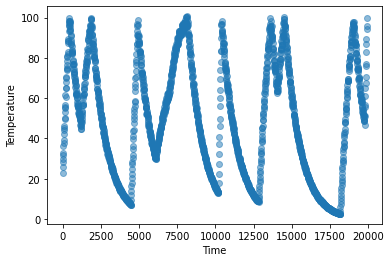

In [19]:
plt.scatter(x='Datetime', y='T', data=data, alpha = 0.5)
plt.xlabel('Time')
plt.ylabel('Temperature')
pass

Видно моменты нагревания воды, кипения и остывания. 
Зависимости между временем и кипением воды нет, поэтому в дальнейшем время можно будет убрать из рассмотрения.

*Диаграмма рассеяния для мощности и температуры:*

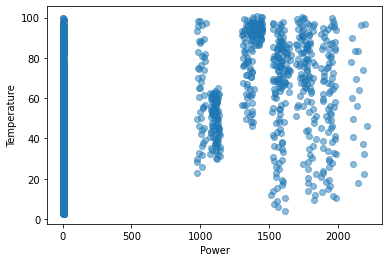

In [20]:
plt.scatter(x='P', y='T', data=data, alpha = 0.5)
plt.xlabel('Power')
plt.ylabel('Temperature')
pass

Видно, что при нулевой мощности вода имела разную температуру. Это объяснимо, т.к. после выключения чайника мощность равна нулю, а температура равна $100$ градусам. 

*Диаграмма рассеяния для времени, температуры, объёма воды и мощности*

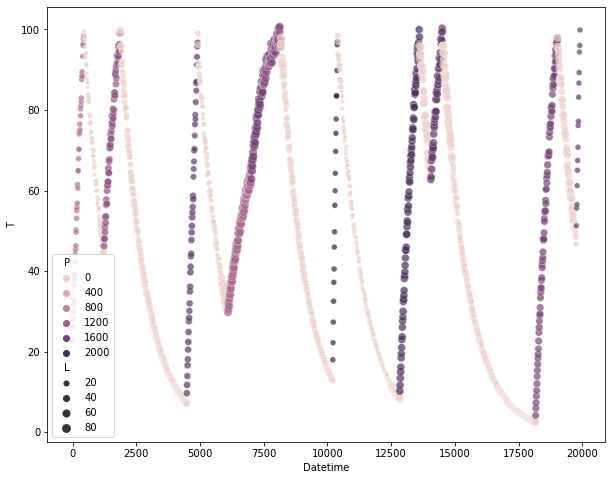

In [21]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Datetime', y='T', size='L', hue='P', data=data, alpha=0.7)
pass 

*Диаграмма рассеяния для всевозможных пар признаков*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


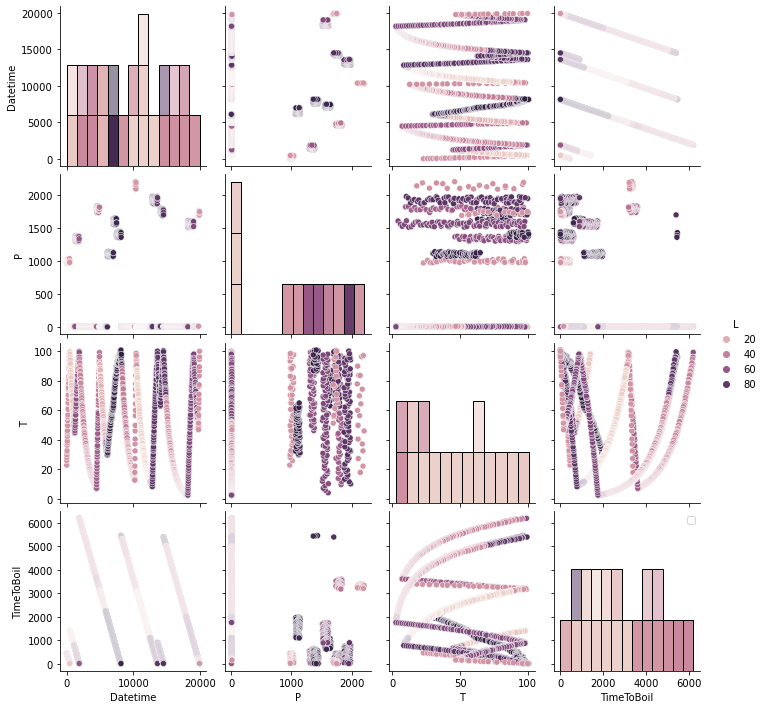

In [22]:
sns.pairplot(data, hue='L', diag_kind='hist')
plt.legend()
pass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


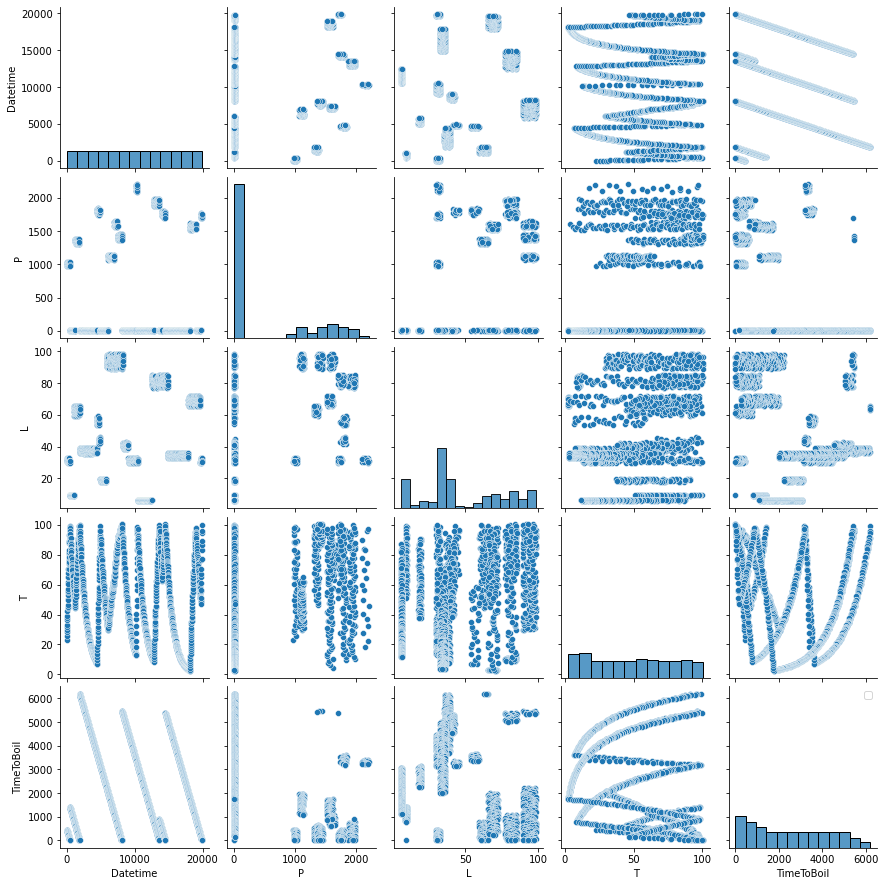

In [23]:
sns.pairplot(data)
plt.legend()
pass

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


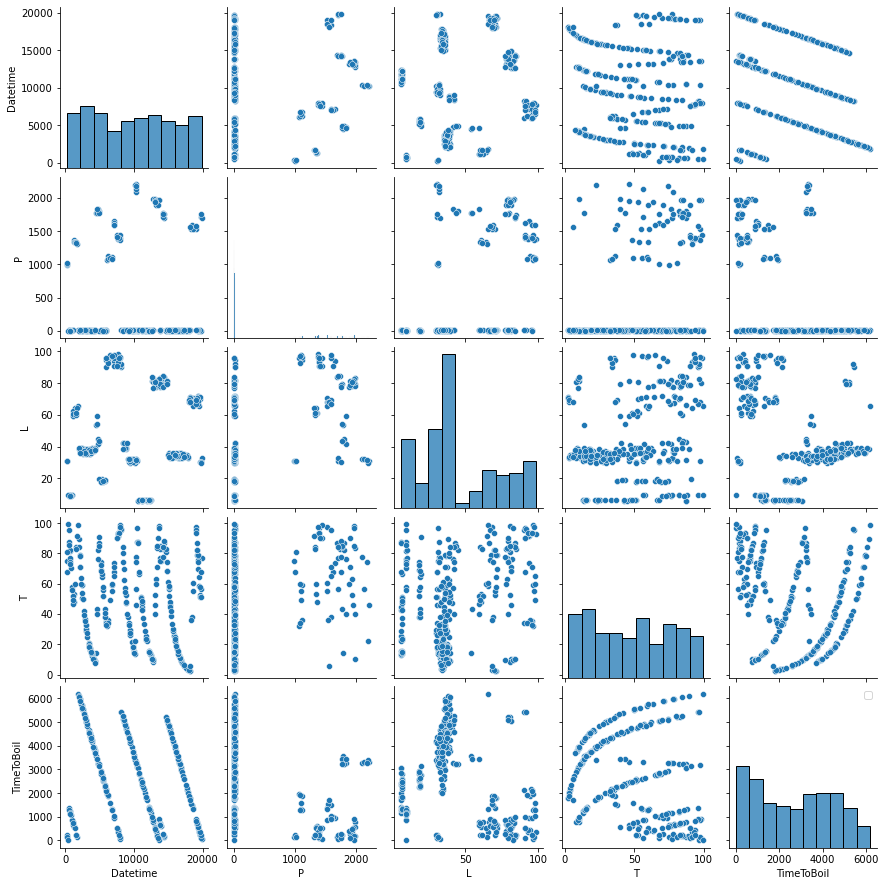

In [24]:
np.random.seed(42)   
random_subset = np.random.choice(np.arange(data.shape[0]), size=300, replace=False)   
sns.pairplot(data.iloc[random_subset])
plt.legend()
pass

Сводная информация по всем признакам:

In [25]:
data.describe()

,Datetime,P,L,T,TimeToBoil
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,9955.000000,464.307179,47.897807,48.684384,2524.919679
std,5751.851876,715.745077,27.858235,28.967301,1748.867523
min,0.000000,0.000000,5.944000,2.499000,0.000000
25%,4977.500000,4.000000,31.712500,21.653500,890.000000
50%,9955.000000,8.800000,37.487500,48.673500,2370.000000
75%,14932.500000,1118.800000,71.638500,74.049500,4030.000000
max,19910.000000,2209.000000,98.420000,100.696000,6200.000000


#### 3.3. Удаление и корректировка выбросов.

При визуализации данных выбросов не обнаружено.

In [26]:
data['P'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       0.0000
0.010       0.1000
0.050       0.8000
0.100       1.5100
0.500       8.8000
0.900    1695.5200
0.950    1835.8700
0.990    1983.1710
0.995    2134.9915
Name: P, dtype: float64

In [27]:
data['P'].max()

2209.0

#### 3.4. Обработка категориальных признаков

Категориальные признаки не присутствуют.

#### 3.5. Обработка пропущенных значений

In [28]:
data.isna().sum()

Datetime      0
P             0
L             0
T             0
TimeToBoil    0
dtype: int64

Пропущенных значений нет.

#### 3.6. Выявление коррелированных признаков. 

In [29]:
corr_mat = data.corr()
corr_mat

,Datetime,P,L,T,TimeToBoil
Datetime,1.000000,-0.004383,0.114083,-0.188044,-0.156778
P,-0.004383,1.000000,0.572187,0.404696,-0.538560
L,0.114083,0.572187,1.000000,0.339288,-0.368444
T,-0.188044,0.404696,0.339288,1.000000,-0.273587
TimeToBoil,-0.156778,-0.538560,-0.368444,-0.273587,1.000000


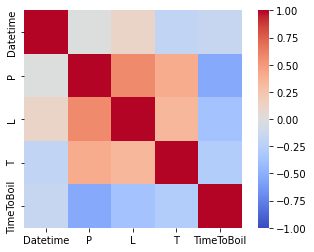

In [30]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Признаки между собой не коррелируют. 

Уровень воды и мощность объяснимы тем, что в чайник наливают побольше воды, а затем его включают.

#### 3.7. Отбор признаков (feature selection). 

Уберем из рассмотрения дату, т.к. она не влияет на кипение.

In [31]:
data_notime = data.drop(['Datetime'], axis=1)
data_notime

,P,L,T,TimeToBoil
0,973.1,30.127,22.878,450
1,1014.7,30.752,25.951,440
2,979.0,31.214,28.080,430
3,978.2,32.662,29.890,420
4,1012.0,32.007,31.742,410
...,...,...,...,...
1987,1746.2,31.558,86.678,40
1988,1732.1,32.614,89.313,30
1989,1708.2,30.972,94.401,20
1990,1737.6,31.240,96.031,10


#### 3.8. Нормализация данных


Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать (привести к одному масштабу).

Наиболее часто используют один из двух следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
(надо отнять минимальное и разделить на разность между максимальным и минимальным)
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
(отнять среднее и разделить на стандартное (средне квадратическое) отклонение)

Выполним стандартизацию всех признаков:

In [32]:
data_stand = (data_notime - data_notime.mean(axis = 0))/data_notime.std(axis = 0)

In [33]:
data_stand.describe()

,P,L,T,TimeToBoil
count,1.992000e+03,1.992000e+03,1.992000e+03,1.992000e+03
mean,6.406076e-16,1.587307e-16,2.509037e-15,-4.347259e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.487047e-01,-1.505975e+00,-1.594397e+00,-1.443746e+00
25%,-6.431161e-01,-5.809882e-01,-9.331516e-01,-9.348448e-01
50%,-6.364098e-01,-3.736887e-01,-3.757353e-04,-8.858286e-02
75%,9.144217e-01,8.521966e-01,8.756465e-01,8.606028e-01
max,2.437590e+00,1.813546e+00,1.795529e+00,2.101406e+00


## 4. Обучаем модель

Разобьём данные на матрицу исходных данных и вектор результатов. 

In [152]:
X = data_stand.drop(['TimeToBoil'], axis=1)
y = data['TimeToBoil'] # сохраним отдельно признак, который хотим предсказывать

Разобьём данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(1494, 498)

### Измерение метрик качества

##### *Остаточная сумма квадратов*:
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где 
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

***

##### *Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где 
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$

***

##### *Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

***

##### *Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

Это усредненная (деленная на N) остаточная сумма квадратов. 

MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

***

##### *Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что правильней отражает суть дела, но добавляет путаницы.

***

##### *Cредняя абсолютная ошибка* (англ. Mean Absolute Error, MAE)

$$
{\rm MAE} =  \frac{1}{N} \sum_{i=1}^N | y^{(i)} - \widehat{y}^{(i)} |
$$

Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.
 ***

##### *Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:



Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). В таких ситуациях вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации — $R^2$

$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$

Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

***

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

### 4.1. Линейная регрессия

In [36]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()    # создаём объект
lr_model.fit(X_train, y_train)   # обучаемся на train

LinearRegression()

In [37]:
y_train_predict_lr = lr_model.predict(X_train)
y_test_predict_lr  = lr_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_train_lr = mean_squared_error(y_train, y_train_predict_lr)
MSE_test_lr  = mean_squared_error(y_test,  y_test_predict_lr)

MSE_train_lr, MSE_test_lr

(2116632.8169017173, 2242090.388934887)

In [39]:
np.sqrt(MSE_train_lr), np.sqrt(MSE_test_lr)  # RMSE 

(1454.8652229336287, 1497.361141787407)

In [40]:
MAE_train_lr = mean_absolute_error(y_train, y_train_predict_lr)
MAE_test_lr  = mean_absolute_error(y_test,  y_test_predict_lr)

MAE_train_lr, MAE_test_lr

(1176.0450790236682, 1234.6343882647645)

In [41]:
R2_train_lr = r2_score(y_train, y_train_predict_lr)
R2_test_lr  = r2_score(y_test,  y_test_predict_lr)

R2_train_lr, R2_test_lr

(0.29905768056870163, 0.28861955361380565)

In [42]:
lr_model.score(X_train, y_train), lr_model.score(X_test, y_test)

(0.29905768056870163, 0.28861955361380565)

In [43]:
y_test

887     4730
1671    3200
414     3940
1080    2800
1102    2580
        ... 
1607    3840
889     4710
942     4180
1837    1540
838     5220
Name: TimeToBoil, Length: 498, dtype: int32

In [44]:
y_test_predict_lr

array([3075.33418894, 3199.41020571, 3171.01004626, 3167.41023567,
       3201.80451704, 3192.65307186, 2883.45619911, 2955.888278  ,
       1111.89366867, 3145.05949044,  998.8739831 ,  846.3023492 ,
       1075.48402797,  757.92737799, 2871.67511789, 3280.57669964,
       1377.89631805, 2767.69435633, 3157.43121779,  593.32132064,
       3172.34360736, 3092.95531151, 3101.49805541, 3301.8720722 ,
       3155.78305711,  808.94808518, 3138.04929738, 3127.64911539,
       3053.10243965, 3268.68081104, 3126.48750706,  503.43993128,
        642.71130422, 2920.919464  , 2881.9316717 , 3127.96342635,
       3141.77745521, 3179.21910209, 3177.35341383, 3127.5684624 ,
       3164.19758218, 1076.73727472, 3295.3392316 , 2856.55919022,
        839.69743159, 3119.72327862, 3137.48534   , 1401.7013429 ,
       3124.74426028, 2994.64863037,  559.69775178, 3106.84235914,
       1544.56543962, 3226.01840629, 3102.03027812, 3191.8017881 ,
       3001.00858116, 3102.11702564, 2887.10421128, 3137.88281

### 4.2. Случайный лес (Random Forest)

In [45]:
from sklearn import ensemble 
rf_model = ensemble.RandomForestRegressor(n_estimators = 150)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [46]:
y_train_predict_rf = rf_model.predict(X_train)
y_test_predict_rf = rf_model.predict(X_test)

In [47]:
y_test

887     4730
1671    3200
414     3940
1080    2800
1102    2580
        ... 
1607    3840
889     4710
942     4180
1837    1540
838     5220
Name: TimeToBoil, Length: 498, dtype: int32

In [48]:
y_test_predict_rf

array([4683.26666667, 3170.33333333, 3701.26666667, 2823.66666667,
       2575.93333333, 3590.06666667,  776.46666667,  303.26666667,
        538.4       , 4088.6       , 3604.        , 3231.86666667,
        198.        ,  243.93333333, 2082.33333333, 1755.46666667,
        714.        , 4855.8       , 4060.33333333,  394.2       ,
       4102.26666667, 5032.26666667, 2900.46666667, 1227.2       ,
       4529.06666667,  832.06666667, 5026.4       , 2781.06666667,
       5441.26666667, 1781.6       , 2859.93333333, 3243.4       ,
        714.46666667,  468.        ,  813.86666667, 4490.66666667,
       1201.06666667, 3632.73333333, 4046.4       , 2797.33333333,
       4144.8       ,  484.6       , 1400.13333333, 3700.46666667,
       3344.46666667, 4551.2       , 4980.13333333,  610.06666667,
       1266.46666667, 1273.4       , 3245.6       , 1324.86666667,
       1399.66666667, 2379.33333333, 5227.46666667, 3128.46666667,
        980.93333333, 4187.86666667, 2156.        , 4412.26666

In [49]:
MSE_train_rf = mean_squared_error(y_train, y_train_predict_rf)
MSE_test_rf  = mean_squared_error(y_test,  y_test_predict_rf)
MSE_train_rf, MSE_test_rf

(61749.13291685259, 352941.5933244087)

In [50]:
np.sqrt(MSE_train_rf), np.sqrt(MSE_test_rf)

(248.49372812377496, 594.0888766206692)

In [51]:
MAE_train_rf = mean_absolute_error(y_train, y_train_predict_rf)
MAE_test_rf  = mean_absolute_error(y_test,  y_test_predict_rf)

MAE_train_rf, MAE_test_rf

(80.27907184292725, 218.60107095046854)

In [52]:
R2_train_rf = r2_score(y_train, y_train_predict_rf)
R2_test_rf  = r2_score(y_test,  y_test_predict_rf)
R2_train_rf, R2_test_rf

(0.9795512097781011, 0.8880171158814668)

Полученные ошибки меньше, чем ошибки линейной регрессии, а коэффициент регрессии Пирсона близок к 1

In [53]:
importances = rf_model.feature_importances_
importances

array([0.2673035 , 0.53563446, 0.19706204])

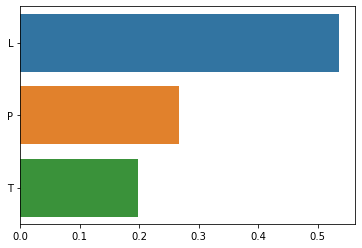

In [54]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
# метод sort_values - отсортированы в убывающем порядке
sns.barplot(y=importances.index, x=importances, orient="h")
pass

Получается, в нашем случае количество воды больше всего влияет на время до закипания, затем мощность чайника, а затем температура воды.



### 4.3. Нейронные сети

Обучим на этих данных полносвязную (неглубокую) нейронную сеть

In [55]:
from sklearn.neural_network import MLPRegressor

In [56]:
mlp_model = MLPRegressor(hidden_layer_sizes = (10,),
                          solver = 'adam', 
                          activation = 'relu',
                          random_state = 42,
                           max_iter=100000)

In [57]:
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=100000, random_state=42)

In [58]:
y_train_predict_mlp = mlp_model.predict(X_train)
y_test_predict_mlp = mlp_model.predict(X_test)

In [59]:
MSE_train_mlp = mean_squared_error(y_train, y_train_predict_mlp)
MSE_test_mlp = mean_squared_error(y_test,  y_test_predict_mlp)
MSE_train_mlp, MSE_test_mlp

(1930562.1154732385, 2091736.600447998)

In [60]:
np.sqrt(MSE_train_mlp), np.sqrt(MSE_test_mlp)

(1389.4466940020543, 1446.283720591502)

In [61]:
MAE_train_mlp = mean_absolute_error(y_train, y_train_predict_mlp)
MAE_test_mlp  = mean_absolute_error(y_test,  y_test_predict_mlp)

MAE_train_mlp, MAE_test_mlp

(1123.1290312075166, 1205.124916193352)

In [62]:
R2_train_mlp = r2_score(y_train, y_train_predict_mlp)
R2_test_mlp  = r2_score(y_test,  y_test_predict_mlp)
R2_train_mlp, R2_test_mlp

(0.3606766954474371, 0.33632447474344385)

***

### 4.4. Gradient boosting machine

In [63]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()

In [64]:
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [65]:
y_train_predict_lgb = lgb_model.predict(X_train)
y_test_predict_lgb = lgb_model.predict(X_test)

In [66]:
MSE_train_lgb = mean_squared_error(y_train, y_train_predict_lgb)
MSE_test_lgb = mean_squared_error(y_test,  y_test_predict_lgb)
MSE_train_lgb, MSE_test_lgb

(140242.01666129509, 467775.6672342684)

In [67]:
np.sqrt(MSE_train_lgb), np.sqrt(MSE_test_lgb)

(374.48900739713986, 683.9412746970813)

In [68]:
MAE_train_lgb = mean_absolute_error(y_train, y_train_predict_lgb)
MAE_test_lgb  = mean_absolute_error(y_test,  y_test_predict_lgb)

MAE_train_lgb, MAE_test_lgb

(172.78000889715824, 312.0886698200231)

In [69]:
R2_train_lgb = r2_score(y_train, y_train_predict_lgb)
R2_test_lgb  = r2_score(y_test,  y_test_predict_lgb)
R2_train_lgb, R2_test_lgb

(0.9535575733044795, 0.8515820483384724)

## 5. Оптимизация гиперпараметров

При решении задачи машинного обучения для повышения качества предсказания важно не только провести работу с исходными данными, но и провести настройку гиперпараметров модели.
Гиперпараметры модели это параметры модели, определяемые программистом до начала процесса обучения модели.


Один из самых простых алгоритмов нахождения оптимального набора гиперпараметров — GridSearch. Этот алгоритм основан на идее кроссвалидации. Исходное обучающее множество делится на три части: обучающую выборку, выборку валидации и тестовую выборку.

Для каждого гиперпараметра, подлежащего определению, задаётся набор рассматриваемых значений. Затем в цикле перебираются все возможные комбинации гиперпараметров, для каждой комбинации на обучающей выборке обучается модель, задаваемая текущей комбинацией, после этого на выборке валидации вычисляется функция потерь.

Модель с набором гиперпараметров, доставляющим минимум функции потерь на выборке валидации, объявляется оптимальной. После этого вычисляется функция потерь для оптимальной модели на тестовой выборке.

Если значение функции потерь на выборке валидации сильно меньше значения функции потерь на тестовой выборке, то это означает, что модель «переобучена», то есть, она подстроилась под случайно обнаруженные закономерности в выборке валидации, которых нет в генеральной совокупности.

Если же значения функции потерь на выборке валидации и на тестовой выборке приблизительно равны, то такую модель можно использовать.

In [70]:
from sklearn.model_selection import GridSearchCV

### 5.1. Поиск гиперпараметров для случайного леса

Random forest: количество деревьев, максимальная глубина дерева, количество используемых каждым деревом факторов.
***

Отдельно создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем. Для примера будем использовать следующие параметры:

n_estimators – число деревьев в лесу. Оно будет изменяться от 10 до 50 с шагом 10

max_depth – глубина дерева. Она будет изменяться от 1 до 12 с шагом в 2

min_samples_leaf – минимальное число образцов в листах. Оно будет изменяться от 1 до 7

min_samples_split – минимальное число образцов для сплита. Оно будет изменяться от 2 до 9.

max_features - 

In [71]:
rf_parametrs = { 'n_estimators': [10, 50, 100, 150, 200, 250, 300],
              'max_depth': [1, 5, 12],
              'min_samples_leaf': [1, 4, 8],
              'min_samples_split': [2, 6, 8] }

Запускаем обучение:

In [72]:
rf_grid = GridSearchCV(rf_model, rf_parametrs, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=150),
             param_grid={'max_depth': [1, 5, 12], 'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 6, 8],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300]})

Выводим результат:

In [73]:
rf_grid.best_params_

{'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Полученные параметры являются лучшими для нашей модели.

### 5.2. Поиск гиперпараметров для нейронной сети

Нейронные сети: learning rate, архитектура сети, в частности: количество нейронов на каждом слое.

In [74]:
mlp_parametrs = { 'hidden_layer_sizes':[5, 10, 15, 20, 30],
              'learning_rate_init': [0.001, 0.01, 0.1] }

In [75]:
mlp_grid = GridSearchCV(mlp_model, mlp_parametrs)
mlp_grid.fit(X_train, y_train)

GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(10,), max_iter=100000,
                                    random_state=42),
             param_grid={'hidden_layer_sizes': [5, 10, 15, 20, 30],
                         'learning_rate_init': [0.001, 0.01, 0.1]})

In [76]:
mlp_grid.best_params_

{'hidden_layer_sizes': 20, 'learning_rate_init': 0.001}

### 5.3. Поиск гиперпараметров для градиентного бустинга

Gradient boosting: количество итераций алгоритма, learning rate, а также гиперпараметры решающих деревьев.

In [77]:
lgb_parametrs = { 'n_estimators': [10, 50, 100, 150, 200, 250, 300],
                 'max_depth': [1, 2, 5, 7, 9, 12],
              'learning_rate': [0.001, 0.01, 0.1], 
                }

In [78]:
lgb_grid = GridSearchCV(lgb_model, lgb_parametrs, cv=5)
lgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 5, 7, 9, 12],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300]})

In [79]:
lgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 100}

## 6. Результаты

Модели при оптимальных параметрах:

In [154]:
rf_model = ensemble.RandomForestRegressor(n_estimators = 300, max_depth = 12, min_samples_leaf = 1, min_samples_split = 2)
rf_model.fit(X_train, y_train)

y_train_predict_rf = rf_model.predict(X_train)
y_test_predict_rf = rf_model.predict(X_test)

MSE_train_rf = mean_squared_error(y_train, y_train_predict_rf)
MSE_test_rf  = mean_squared_error(y_test,  y_test_predict_rf)

MAE_train_rf = mean_absolute_error(y_train, y_train_predict_rf)
MAE_test_rf  = mean_absolute_error(y_test,  y_test_predict_rf)

R2_train_rf = r2_score(y_train, y_train_predict_rf)
R2_test_rf  = r2_score(y_test,  y_test_predict_rf)

MSE_train_rf, MSE_test_rf, np.sqrt(MSE_train_rf), np.sqrt(MSE_test_rf), MAE_train_rf, MAE_test_rf, R2_train_rf, R2_test_rf

(62138.63081974224,
 350220.17023004784,
 249.27621390686727,
 591.7940268624277,
 81.79756863541768,
 218.01928891951326,
 0.9794222239845874,
 0.8888805811481779)

In [155]:
mlp_model = MLPRegressor(hidden_layer_sizes = (20,),
                          solver = 'adam', 
                          learning_rate_init = 0.001,
                          activation = 'relu',
                          random_state = 42,
                           max_iter=10000)

mlp_model.fit(X_train, y_train)

y_train_predict_mlp = mlp_model.predict(X_train)
y_test_predict_mlp = mlp_model.predict(X_test)

MSE_train_mlp = mean_squared_error(y_train, y_train_predict_mlp)
MSE_test_mlp = mean_squared_error(y_test,  y_test_predict_mlp)

MAE_train_mlp = mean_absolute_error(y_train, y_train_predict_mlp)
MAE_test_mlp  = mean_absolute_error(y_test,  y_test_predict_mlp)

R2_train_mlp = r2_score(y_train, y_train_predict_mlp)
R2_test_mlp  = r2_score(y_test,  y_test_predict_mlp)

MSE_train_mlp, MSE_test_mlp, np.sqrt(MSE_train_mlp), np.sqrt(MSE_test_mlp), MAE_train_mlp, MAE_test_mlp, R2_train_mlp, R2_test_mlp

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


(1012981.4605029881,
 1029007.0201987325,
 1006.4698010884321,
 1014.3998325111911,
 749.6715350386199,
 756.2573725259086,
 0.6645419230033424,
 0.6735120595600749)

In [156]:
lgb_model = LGBMRegressor(learning_rate = 0.1, max_depth = 12, n_estimators = 100)
lgb_model.fit(X_train, y_train)

y_train_predict_lgb = lgb_model.predict(X_train)
y_test_predict_lgb = lgb_model.predict(X_test)

MSE_train_lgb = mean_squared_error(y_train, y_train_predict_lgb)
MSE_test_lgb = mean_squared_error(y_test,  y_test_predict_lgb)

MAE_train_lgb = mean_absolute_error(y_train, y_train_predict_lgb)
MAE_test_lgb  = mean_absolute_error(y_test,  y_test_predict_lgb)

R2_train_lgb = r2_score(y_train, y_train_predict_lgb)
R2_test_lgb  = r2_score(y_test,  y_test_predict_lgb)

MSE_train_lgb, MSE_test_lgb, np.sqrt(MSE_train_lgb), np.sqrt(MSE_test_lgb), MAE_train_lgb, MAE_test_lgb, R2_train_lgb, R2_test_lgb

(144843.22789537263,
 464416.2489824376,
 380.582747763706,
 681.4809234178442,
 178.10194313303924,
 308.1847018733104,
 0.9520338401142663,
 0.852647939556498)

Сравнительная таблица для тестовой выборки:

$$
\begin{array}{c|c|c|c|c|}
    &   Linear \ Regression & Random \ Forest & Neural \ Network & Gradient \ boosting \ machine \\
\hline
MSE & {\rm 2242090} & {\rm 350220} & {\rm 1029007} & {\rm 464416}\\
\hline
RMSE & {\rm 1497} & {\rm 592} & {\rm 1014} & {\rm 681} \\
\hline
MAE & {\rm 1235} & {\rm 218} & {\rm 756} & {\rm 308} \\
\hline
R^2 & {\rm 0.29} & {\rm 0.89} & {\rm 0.67} & {\rm 0.85} \\
\hline
\end{array}
$$

Таким образом, лучший результат даёт Random Forest